<center> <img src="https://d3i71xaburhd42.cloudfront.net/261c3e30bae8b8bdc83541ffa9331b52fcf015e6/3-Figure2-1.png" width=20% > </center>

# <center> Assignment 1: Photometric Stereo & Colour </center>
<center> Computer Vision 1 University of Amsterdam </center>
<center> Due 23:59PM, September 16, 2023 (Amsterdam time) </center>
<center> <b>TA's: Ozzy Ülger, Egoitz Gonzalez, Sina Taslimi</b></center>
    
***

Student1 ID: \
Student1 Name:

Student2 ID: \
Student2 Name:

Student3 ID: 12556963\
Student3 Name: Thomas Komen

( Student4 ID: \
Student4 Name: )


# General guidelines


Your code and discussion must be handed in this jupyter notebook, renamed to **StudentID1_StudentID2_StudentID3.ipynb** before the deadline by submitting it to the Canvas Lab 1 Assignment. Please also fill out your names and ID's above.

For full credit, make sure your notebook follows these guidelines:
- It is mandatory to use the Python environment provided with the assignment; the environment specifies the package versions that have to be used to prevent the use of particular functions. Using different packages versions may lead to grade deduction. In the 'Environment Setup' below you can check whether your environment is set up correctly.
- To install the environment with the right package versions, use the following command in your terminal: ```python
conda env create --file=environment.yaml```, then activate the environment using the command ```python conda activate cv1```.
- Please express your thoughts concisely. The number of words does not necessarily correlate with how well you understand the concepts.
- Answer all given questions and sub-questions.
- Try to understand the problem as much as you can. When answering a question, give evidences (qualitative and/or quantitative results, references to papers, figures etc.) to support your arguments. Note that not everything might be explicitly asked for and you are expected to think about what might strengthen you arguments and make the notebook self-contained and complete.
- Tables and figures must be accompanied by a brief description. Do not forget to add a number, a title, and if applicable name and unit of variables in a table, name and unit of axes and legends in a figure.

__Note:__ A more complete overview of the lab requirements can be found in the Course Manual on Canvas

Late submissions are not allowed. Assignments that are submitted after the strict deadline will not be graded. In case of submission conflicts, TAs’ system clock is taken as reference. We strongly recommend submitting well in advance, to avoid last minute system failure issues.
Plagiarism note: Keep in mind that plagiarism (submitted materials which are not your work) is a serious crime and any misconduct shall be punished with the university regulations. This includes the use of generative tools such as ChatGPT.

**ENSURE THAT YOU SAVE ALL RESULTS / ANSWERS ON THE QUESTIONS (EVEN IF YOU RE-USE SOME CODE).**

# 0 Environment Setup

In [1]:
# environment and libraries
import os
import glob
import numpy as np
import random
import cv2
import matplotlib
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D   # necessary in part 4.

In [2]:
# Make sure you're using the provided environment!
assert cv2.__version__ == "3.4.8", "You're not using the provided Python environment!"
assert np.__version__ == "1.19.5", "You're not using the provided Python environment!"
assert matplotlib.__version__ == "3.3.4", "You're not using the provided Python environment!"
# Proceed to the next cell if you don't get any error.

# 1 Colour Spaces *(13 pts)*

In this part of the assignment, you will study the different colour spaces for image representations and experiment how to convert a given RGB image to a specific colour space

### 1.1 RGB Colour Model (2 pts)

Why do we use a RGB colour model as the basis of our digital cameras and photography? How does a standard digital camera capture the full RGB colour image?


*We use a RGB model as the basis of our digital cameras and photography due to the biological structure of human eyes. Human beings have light sensitive cells in retina that convert light energy into electrical signals, which are further processed by the brain. Specifically, we have receptors that are sensitive to light, which are called cones. Cones are responsible for differentiating between different colors. We have 3 types of cones, where each of the types is sensitive to a different portion of the color spectrum: red (700.0nm), green (546.1nm) and blue (435.8nm). Combinations of these colors can represent any other color that is visible by a human eye. Therefore it makes sense to use these 3 primary colors as the basis of digital cameras.*


*A standard digital camera captures the full RGB colour image by using a filter, which is put on top of the sensor. The most popular filter is the Bayer filter, which follows a checkerboard pattern with green filling in half of the checkerboard, and red and blue fill the rest.*

### 1.2 Colour Space Conversion *(8 pts)*





Create a function to convert an RGB image into the following colour spaces by using the template code you are provided ConvertColourSpace() below and other sub-functions. Visualize the new image and its channels separately in the same figure. That is, for example, in the case of HSV colour space, you need to visualize the converted HSV image, and its Hue, Saturation and Value channels separately (4 images, 1 figure).

__Grayscale__

Convert the RGB image into grayscale by using 3 different methods mentioned in
https://www.johndcook.com/blog/2009/08/24/algorithms-convert-color-grayscale/
In addition, check and report which method OpenCV uses for grayscale conversion, include it as well, and visualize all 4 in the same figure.

__Opponent Colour Space__

$\begin{pmatrix}
O_1 \\
O_2 \\
O_3
\end{pmatrix}$ = $\begin{pmatrix}
\frac{R-G}{\sqrt{2}} \\
\frac{R+G-2B}{\sqrt{6}} \\
\frac{R+G+B}{\sqrt{3}}
\end{pmatrix}$

__Normalized RGB (rgb) Colour Space__

$\begin{pmatrix}
r \\
g \\
b
\end{pmatrix}$ = $\begin{pmatrix}
\frac{R}{R+G+B} \\
\frac{G}{R+G+B} \\
\frac{B}{R+G+B}
\end{pmatrix}$

__HSV Colour Space__

Convert the RGB image into HSV Colour Space. Use OpenCV’s built-in function *cv2.cvtColor(img, cv2.RGB2HSV)*.

__YCbCr Colour Space__

Convert the RGB image into YCbCr Colour Space. Use OpenCV’s built-in function *cv2.cvtColor(img, cv2.RGB2YCrCb)*. Note, you need to arrange the channels in $Y, C_b$ and $C_r$ order.

__HINT 1__

Ensure you understand the datatypes and ranges that the python conversion and image displaying functions require. This usually is [0, 1] for float datatype or [0, 255] for integer datatype. You may have to explicitely change the datatype.

__HINT 2__

Think about how to visualise for instance H, S, V channels. Do this in a manner that is meaningful, e.g. visualize each of the H, S, V channels in a RGB manner.  

In [3]:
def read_img(path):
    """
    Reads an image from a spacified path and converts it
    to range [0, 255].
    """
    img = plt.imread(path)
    return img2int(img)

def img2float(img):
    """ Converts image to range [0, 1] """
    if img.dtype == 'uint8':
        return img / 255
    return img

def img2int(img):
    """ Converts image to range [0, 255] """
    if img.dtype in ['float16', 'float32']:
        img = (img * 255).astype('uint8')
    return img

In [4]:
def rgb2grays(input_image, method='opencv'):
    # converts an RGB into grayscale by using 4 different methods
    
    # lightness method
    if method == 'lightness':
        new_image = (input_image.max(axis=2) + input_image.min(axis=2)) / 2

    # average method
    if method == 'average':
        new_image = input_image.mean(axis=2)

    # luminosity method
    if method == 'luminosity':
        new_image = 0.21*input_image[:,:,0] + 0.72*input_image[:,:,1] + 0.07*input_image[:,:,2]

    # built-in opencv function
    if method == 'opencv':
        # uses RGB[A] to Gray:Y←0.299⋅R+0.587⋅G+0.114⋅B
        new_image = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

    return new_image


def rgb2opponent(input_image):
    # converts an RGB image into opponent colour space
    input_image = img2float(input_image)
    
    # Split different channels
    R, G, B = input_image[:, :, 0], input_image[:, :, 1], input_image[:, :, 2]
    
    # Convert into opponent color space
    O1 = (R - G)/np.sqrt(2)
    O2 = (R + G - 2*B)/np.sqrt(6)
    O3 = (R + G + B)/np.sqrt(3)
    
    # Stack back to 3 channels
    new_image = np.stack([O1, O2, O3], axis=2)

    return new_image


def rgb2normedrgb(input_image):
    # converts an RGB image into normalized RGB colour space

    # Split different channels
    R, G, B = input_image[:, :, 0], input_image[:, :, 1], input_image[:, :, 2]
    
    total = R + G + B
    
    r = R / total
    g = G / total
    b = B / total
    
    # Stack back to 3 channels
    new_image = np.stack([r, g, b], axis=2)
    
#     new_image[np.isnan(new_image)] = 0

    return new_image


In [30]:
def visualize(input_image, new_image, colourpace='rgb'):
    '''
     Visualize the image and the channels from the new colour space separately
     in the same figure.
     Show the new colour space in a descriptive and meaningful manner.
     That is, for example, in the case of HSV colour space, you need to
     visualize the converted HSV image, and its Hue, Saturation and Value
     channels separately (4 images, 1 figure).
    '''

    # Plot a new image and each of the channels
    fig, axs = plt.subplots(2, 2, figsize=(8, 10))
    
    if colourpace == 'rgb':    
        axs[0, 0].imshow(new_image)
        axs[0, 0].set_title("Normalized RGB image")
        axs[0, 1].imshow(new_image[:, :, 0])
        axs[0, 1].set_title("Normalized Red")
        axs[1, 0].imshow(new_image[:, :, 1])
        axs[1, 0].set_title("Normalized Green")
        axs[1, 1].imshow(new_image[:, :, 2])
        axs[1, 1].set_title("Normalized Blue")
        
    elif colourpace == 'gray':
        for i, ax, title in zip(range(new_image.shape[-1]), axs.flatten(), ['opencv', 'lightness', 'average', 'luminosity']):
            ax.imshow(new_image[:, :, i], cmap='gray')
            ax.set_title(f"{title} method")
            
    elif colourpace == 'ycbcr':
        new_image = img2int(new_image)
        y, cr, cb = new_image[:, :, 0], new_image[:, :, 1], new_image[:, :, 2]
        
        cb_ = 128 * np.ones_like(new_image)
        cb_[:, :, 2] = cb
        cb_rgb = cv2.cvtColor(cb_, cv2.COLOR_YCrCb2RGB)
        
        cr_ = 128 * np.ones_like(new_image)
        cr_[:, :, 1] = cr
        cr_rgb = cv2.cvtColor(cr_, cv2.COLOR_YCrCb2RGB)
        
        axs[0, 0].imshow(new_image[:, :, [0, 2, 1]])
        axs[0, 0].set_title("YCbCr image")
        axs[0, 1].imshow(y, cmap='gray')
        axs[0, 1].set_title("Y channel only")
        axs[1, 0].imshow(cb_rgb)
        axs[1, 0].set_title("Cb channel only")
        axs[1, 1].imshow(cr_rgb)
        axs[1, 1].set_title("Cr channel only")
        
    if colourpace == 'opponent':
        rg, yb, l = new_image[:, :, 0], new_image[:, :, 1], new_image[:, :, 2]
    
        rg_ = 0.5 * np.ones_like(new_image)
        rg_[:, :, 0] = rg
        
        yb_ = 0.5 * np.ones_like(new_image)
        yb_[:, :, 1] = yb
        
        
        axs[0, 0].imshow(new_image)
        axs[0, 1].imshow(l, cmap='gray')
        axs[1, 0].imshow(rg)
        axs[1, 1].imshow(yb)
    
    elif colourpace == 'hsv':
        h, s, v = new_image[:, :, 0], new_image[:, :, 1], new_image[:, :, 2]
        
        # Setting S and V to 1 and convert back to RGB to visualize only the H channel
        h_ = np.ones_like(new_image)
        h_[:, :, 0] = h 
        h_rgb = cv2.cvtColor(h_, cv2.COLOR_HSV2RGB)
        
        # Setting H and V to 1 and convert back to RGB to visualize only the S channel
        s_ = np.ones_like(new_image)
        s_[:, :, 1] = s
        s_rgb = cv2.cvtColor(s_, cv2.COLOR_HSV2RGB)
        
        # Setting H to 1 ans S to 0 and convert back to RGB to visualize only the V channel
        v_ = np.ones_like(new_image)
        v_[:, :, 1] = np.zeros_like(s)
        v_[:, :, 2] = v
        v_rgb = cv2.cvtColor(v_, cv2.COLOR_HSV2RGB)
        
        axs[0, 0].imshow(input_image)
        axs[0, 0].set_title("Original image")
        
        axs[0, 1].imshow(h_rgb[:, :, 0], cmap='bwr')
        axs[0, 1].set_title("H channel visualization (S=1, V=1)")
        
        axs[1, 0].imshow(s_rgb[:, :, 1], cmap='magma')
        axs[1, 0].set_title("S channel visualization (H=1, V=1)")
        
        axs[1, 1].imshow(v_rgb[:, :, 2], cmap='gray')
        axs[1, 1].set_title("V channel visualization (H=1, S=0)")


In [7]:
def ConvertColourSpace(input_image, colourspace):
    '''
    Converts an RGB image into a specified color space, visualizes the
    color channels and returns the image in its new color space.

    Colorspace options:
      opponent
      rgb -> for normalized RGB
      hsv
      ycbcr
      gray

    P.S: Do not forget the visualization part!
    '''

    # Convert the image into double precision for conversions
    input_image = img2float(input_image)
    input_image = input_image.astype(np.float32)

    if colourspace.lower() == 'opponent':
        # fill in the rgb2opponent function
        new_image = rgb2opponent(input_image)

    elif colourspace.lower() == 'rgb':
        # fill in the rgb2normedrgb function
        new_image = rgb2normedrgb(input_image)

    elif colourspace.lower() == 'hsv':
        # use built-in function from opencv
        new_image = cv2.cvtColor(input_image, cv2.COLOR_RGB2HSV)

    elif colourspace.lower() == 'ycbcr':
        # use built-in function from opencv
        new_image = cv2.cvtColor(input_image, cv2.COLOR_RGB2YCrCb)

    elif colourspace.lower() == 'gray':
        # fill in the rgb2grays function
        new_image_opencv = rgb2grays(input_image, method='opencv')
        new_image_lightness = rgb2grays(input_image, method='lightness')
        new_image_average = rgb2grays(input_image, method='average')
        new_image_luminosity = rgb2grays(input_image, method='luminosity')
        new_image = np.stack([new_image_lightness, new_image_average, new_image_luminosity, new_image_opencv], axis=2)

    else:
        print('Error: Unknown colorspace type [%s]...' % colourspace)
        new_image = input_image
    
    visualize(input_image, new_image, colourspace.lower())
    
    return new_image


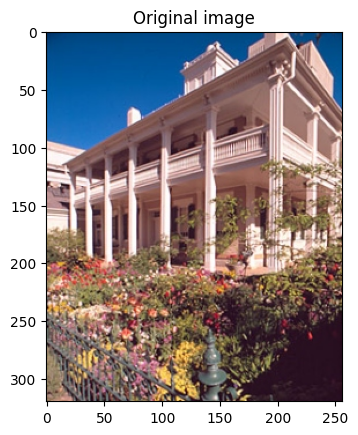

In [12]:
img = read_img("images/awb/awb.jpg")
plt.imshow(img)
plt.title("Original image");

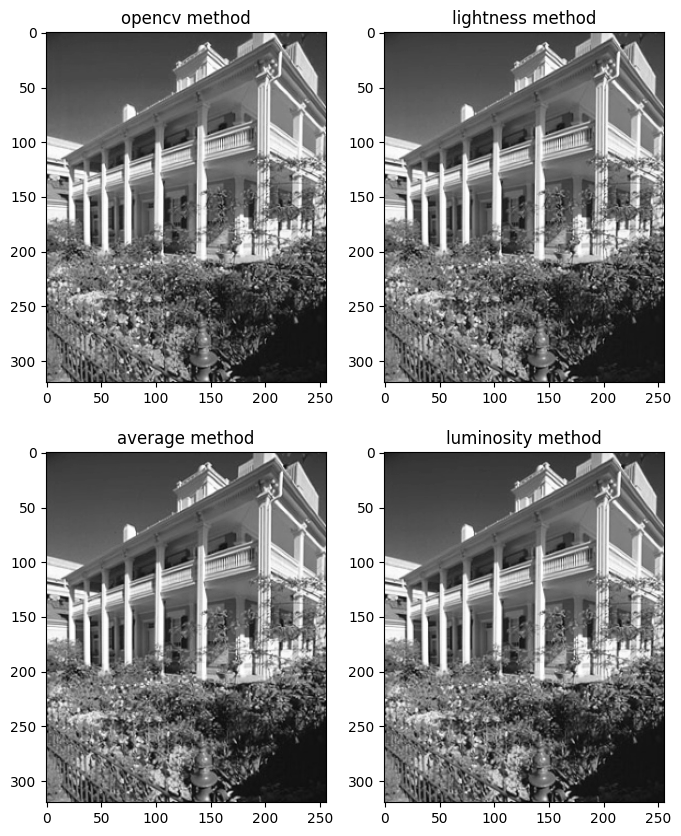

In [13]:
new_img = ConvertColourSpace(img, colourspace='gray')

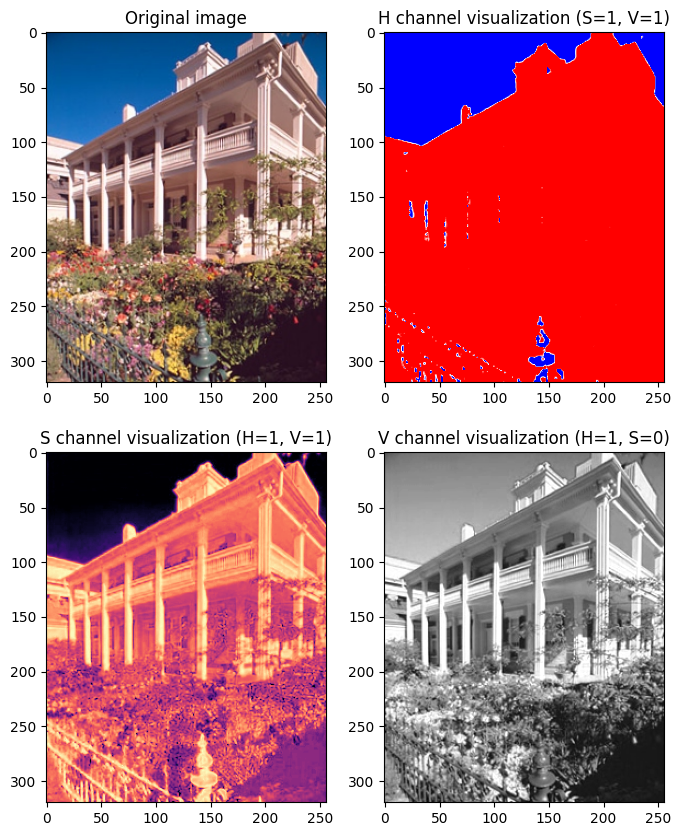

In [14]:
new_img = ConvertColourSpace(img, colourspace='hsv')

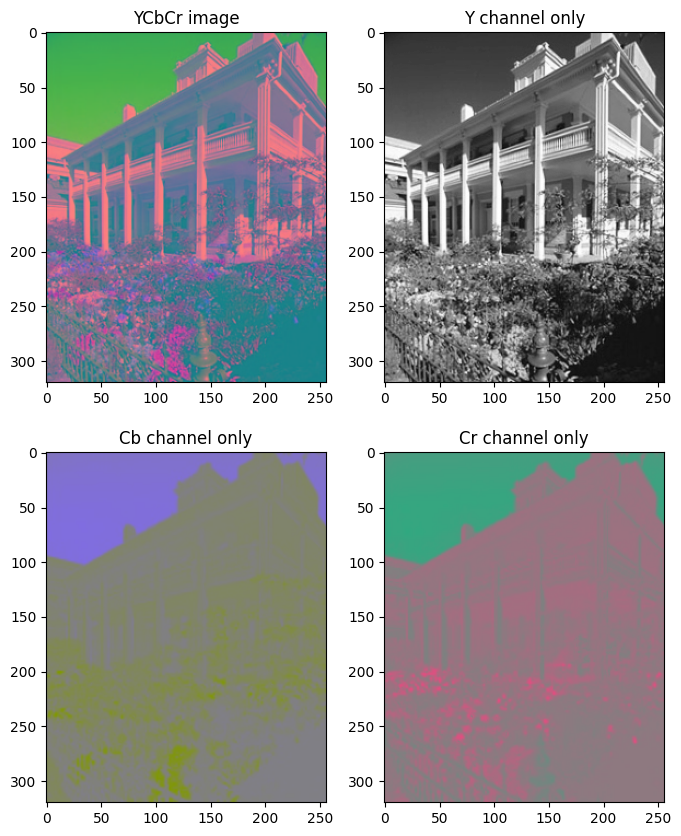

In [15]:
new_img = ConvertColourSpace(img, colourspace='ycbcr')

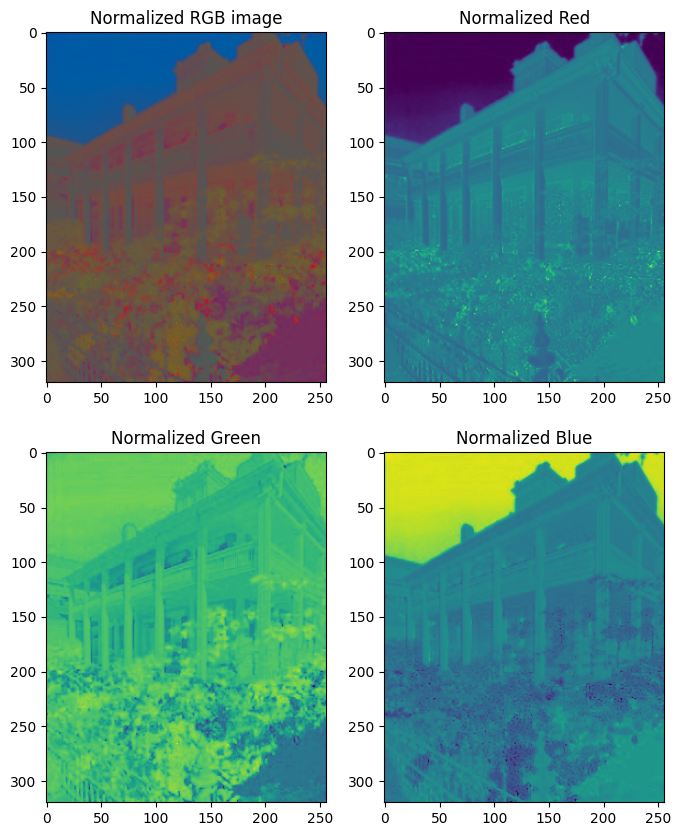

In [31]:
new_img = ConvertColourSpace(img, colourspace='rgb')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


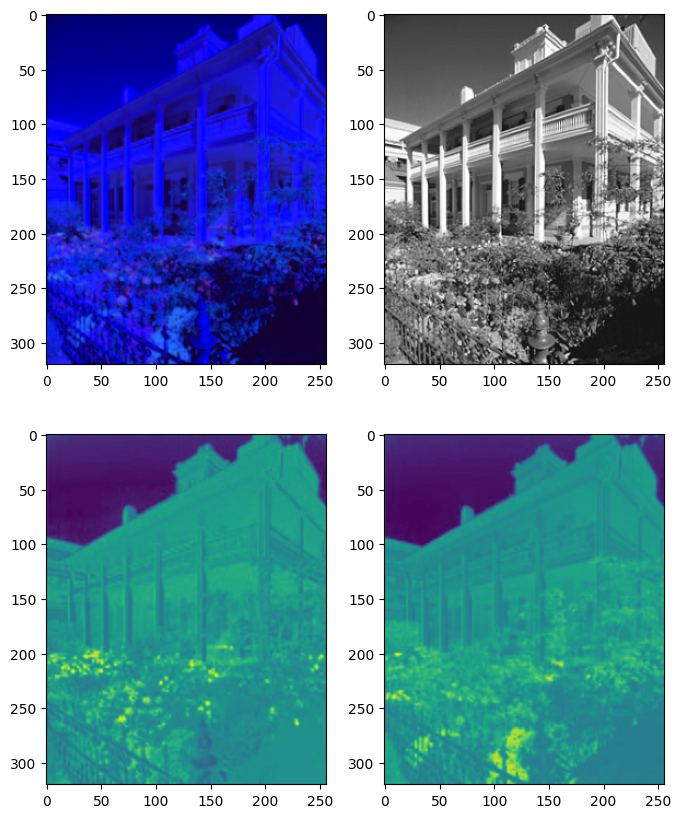

In [46]:
new_img = ConvertColourSpace(img, colourspace='opponent')

### 1.3 Colour Space Properties (2 pts)

Explain each of the above 5 colour spaces and their properties. What are the benefits of using a different colour space other than RGB? Provide reasons for each of the above cases. You can include your observations from the visualizations.

#### *Grayscale*
*The grayscale color space has only 1 channel. It shows the intensity of the pixels in the range between 0 and 1 (or 0 and 255), where the minimum value (0) represents pure black and the maximum value (1 or 255) represents pure white.*

*The advantage of graysacale over RGB is that it has only 1 channel which requires less memory, means faster processing and is compatible with a wider range of devices.*


#### *HSV*
*In the HSV color space the color is represented by a **Hue** (which is an angle from 0 to 360 that represents which color on the color wheel is selected), **Saturation** (which is a number between 0 and 1 that can be interpreted as percentage of how much pure color is added) and **Value** (a number between 0 and 100 which represents the brightness of the color where 0 represents full darkness and 100 full brightness)*

*This color space is more intuitive for human interpretation than RGB. It also separates separates the color from the brightness.*


#### *Normalized RGB*
*In normalized RGB, the pixels in each channel are scaled by the sum of values of the pixels over all channels (R, G and B). Converting to normalized RGB is used to reduce the effects of light and shades by averaging out the variations in intensity.*


#### *Opponent*
- *O1 is the red-green channel*
- *O2 is the blue-yellow channel*
- *O3 is luminance component*

*This color space is based on opponent color theory which is designed to match how humans perceive colors. Essentialy it claims that humans percive red-green and blue-yellow colors as opposite to each other. The opponent color space has 3 channels:*
- *blue vs. yellow*
- *red vs. green*
- *black vs. white (luminance)*


#### *YCbCr*

*Y is the luminance component and CB and CR are the blue-difference and red-difference chroma components.*

*YCbCr is mainly used for compression. It separates the brightness and color, and allows to pack the same amount of information into less memory.*

### 1.4 More on Colour Spaces (1 pt)

Find one more colour space from the literature, briefly explain its properties and give a use case.

*XYZ color space, where Y represents luminance and a point on the XZ plane contains all possible chromaticities at that luminance. This color space is linear, which makes it suitable for mathematical operations and conversion to other color spaces (since it forms the basis for almost all other color spaces). For instance, we can translate RGB values to XYZ color space using a matrix multiplication.*

# 2 Colour Constancy *(15 pts)*

Colour constancy is the ability to perceive colors of objects, invariant to the colour of the light source. The aim for colour constancy algorithms is first to estimate the illuminant of the light source, and then correct the image so that the corrected image appears to be taken under a canonical (white) light source. The task of the automatic white balance (AWB) is to do the same in digital cameras so that the images taken by a digital camera look as natural as possible.

In this part of the assignment, you will implement the most famous colour constancy algorithm; *Grey-World Algorithm*. The algorithm assumes that, under a white light source, the average colour in a scene should be achromatic (grey, [128, 128, 128]).

Specific information on the algorithm can be found on:
https://en.wikipedia.org/wiki/Color_normalization#Grey_world



### 2.1 Grey-World algorithm (8 pts)

Complete the function to apply colour correction to an RGB image by using Grey-World algorithm. Display the original image and the colour corrected one on the same figure. Use awb.jpg image (provided in the downloaded zip-file) to test your algorithm. In the end, you should see that the reddish colour cast on the image is removed and it looks more natural.

  ***Note:*** You do not need to apply any pre or post processing steps. For the calculation or processing, you are not allowed to use any available code or any dedicated library function except *standard Numpy functions*.
   

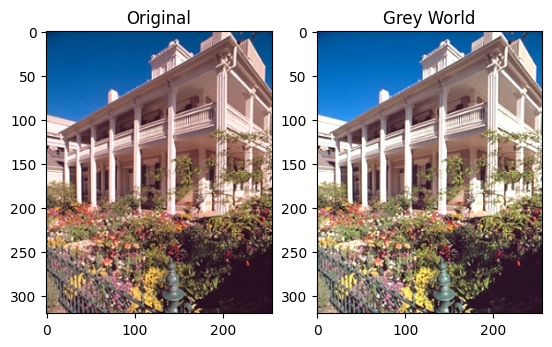

In [41]:
def grey_world(awb_img):
    colorCorrectedImg = awb_img.copy()
    for i in range(3):
        colorCorrectedImg[:, :, i] = np.clip((colorCorrectedImg[:, :, i]/np.mean(colorCorrectedImg[:, :, i]))*128,0,255)
    return colorCorrectedImg

awb = plt.imread("./images/awb/awb.jpg")
corrected_img = grey_world(awb)
fig = plt.subplot(121)
fig.imshow(awb)
plt.title("Original")
fig = plt.subplot(122)
fig.imshow(corrected_img)
plt.title("Grey World")
plt.show()

### 2.2 Limits of Grey-World (2 pts)

Give an example case for Grey-World Algorithm on where it might fail. Include your reasoning.


*When a lot of values hover just below 255, but the mean is still below 128, all of these values exceed the limit of 255. This causes pixels with initially different values to all get assigned the same value of 255, therefore reducing the contrast between these pixels.*

### 2.3 Other Constancy algorithms (5 pts)

Find out one more colour constancy algorithm from the literature and explain it briefly.


*Histogram equalization, a method where you create a histogram of all the values of each colour going from 0 to 255. The idea is that an image has the most contrast when the histogram is broad and equally spread out. When an image has a very narrow histogram, the algorithm can spread out the pixels across the full spectrum instead, keeping the order of the values intact, but proportianally filling in each bucket of values (i.e. the lower 10% gets 10% of all the pixels, 0-128 should contain 50% of all pixels, etc.)*

# 3 Intrinsic Image Decomposition *(12 pts)*


Intrinsic image decomposition is the process of separating an image into its formation components, such as reflectance (albedo) and shading (illumination). <a name="cite_ref-1"></a>[<sup>[1]</sup>](#cite_note-1) Then, under the assumptions of body (diffuse) reflection, linear sensor response and narrow band filters, the decomposition of the observed image $I(\vec{x})$ at position $\vec{x}$ can be approximated as the element-wise product of its albedo $R(\vec{x})$ and shading $S(\vec{x})$ intrinsics:

$$I(\vec{x})=R(\vec{x}) \times S(\vec{x})$$

In this part of the assignment, you will experiment with intrinsic image components to perform a particular computational photography applications: material recolouring. For the experiments, we will use images from a synthetic intrinsic image dataset. <a name="cite_ref-2"></a>[<sup>[2]</sup>](#cite_note-2)

<a name="cite_note-1"></a><small>1. [^](#cite_ref-1) H. G. Barrow and J. M. Tenenbaum. Recovering intrinsic scene characteristics from images. Computer Vision Systems, pages 3-26, 1978.</small>

<a name="cite_note-2"></a><small>2. [^](#cite_ref-1) http://www.cic.uab.cat/Datasets/synthetic_intrinsic_image_dataset/



### 3.1 Image decomposition *(2 pts)*

In what other components can an image be decomposed other than albedo and shading? Give an example and explain the concepts in your answer.

*RGB: images are loaded in matplotlib as arrays of shape (h, w, 3), where the color of the pixel at the i-j position is made up of three colors: red, green and blue.*

### 3.2 Synthetic data *(2 pts)*

If you check the literature, you will see that almost all intrinsic image decomposition datasets are composed of synthetic images. What might be the reason for that?

*Because information about the geometry of objects on the image is necessary for illumination. Obtaining this from a real world image would be very difficult. Synthetic images reflect a "perferct world", where you can control anything.*

### 3.3. Reconstructing *(4 pts)*

Pick a favorite object from the synthetic intrinsic image dataset and store it's original image, shading and reflectance in a new folder in *'./images'*, e.g. *./images/intrinsic_images/* (or choose your own folder and change the path in the code). Show that you can actually reconstruct the original PNG image from its intrinsics using the albedo and shading. In the end, your script should output a figure displaying the original image, its intrinsic images and the reconstructed one. Complete the code for function **iid_image_formation()**.

The auxiliary functions are for opening and visualizing the original and intrinsic images. In your submission, only supply the images of the object you picked.

In [33]:
def iid_image_formation(albedo_img, shading_img):
    idd_img = (albedo_img / 255.) * (shading_img / 255.)
    return (idd_img * 255).astype('uint8')

In [35]:
def visualize_(input_image, new_image, colourpace='rgb'):
    fig, axs = plt.subplots(1, 2)
    fig.set_figheight(8)
    fig.set_figwidth(20)
    axs[0].imshow(input_image)
    axs[1].imshow(new_image)

turt_dl: (270, 480, 3)
object_shading: (270, 480, 3)
object_albedo: (270, 480, 3)


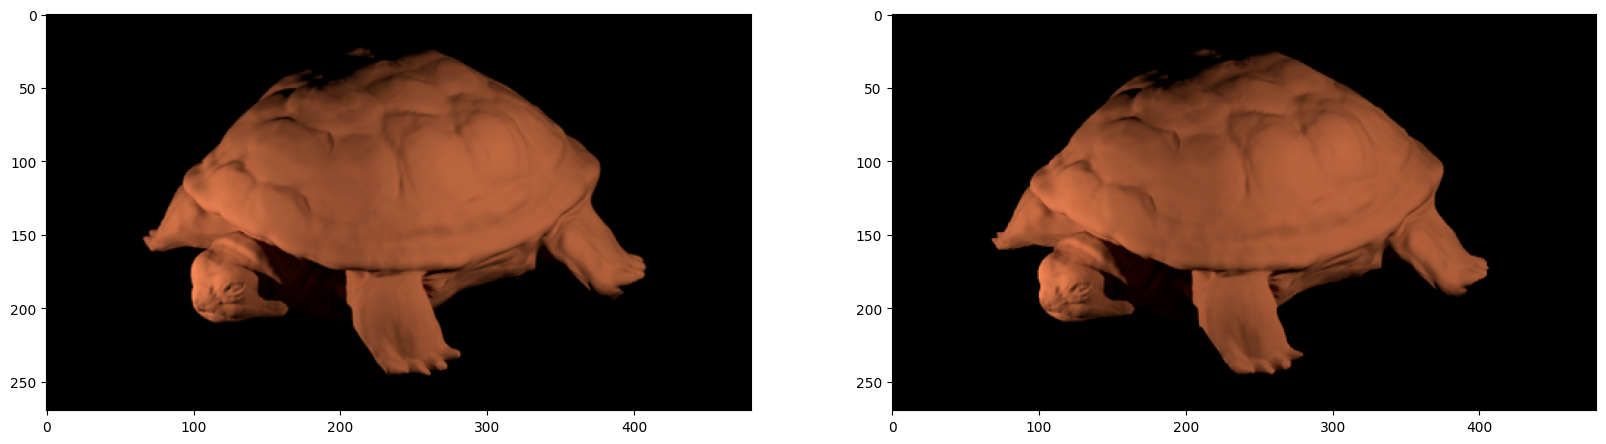

In [42]:
## Replace the image name with a valid image
img_path = './images/intrinsic_images/'
object_name = 'turt_dl'

## Read with opencv
picked_object = cv2.cvtColor(cv2.imread(img_path + object_name + '.png'), cv2.COLOR_BGR2RGB)

if picked_object is None:
    print('no image found')
else:
    print(object_name + ':', picked_object.shape)

object_shading = cv2.imread(img_path + object_name + '_shad.png')
if object_shading is None:
    print('no image found')
else:
    print('object_shading:', object_shading.shape)

object_albedo = cv2.imread(img_path + object_name + '_refl.png')
if object_albedo is None:
    print('no image found')
else:
    print('object_albedo:', object_albedo.shape)


picked_object_IDD = cv2.cvtColor(iid_image_formation(object_albedo, object_shading), cv2.COLOR_BGR2RGB)

visualize_((picked_object/picked_object.max()*255.).astype(int),
          (picked_object_IDD/picked_object_IDD.max()*255.).astype(int))


### 3.4 Recoloring *(4 pts)*


Manipulating colours in photographs is an important problem with many applications in computer vision. Since the aim for recolouring algorithms is just to manipulate colours, better results can be obtained for such a task if the albedo image is available as it is independent of confounding illumination effects.

Assume that you are given the PNG image and you have access to its
intrinsic albedo and shading images.
1. Find out the true material colour of the object you picked in RGB space (which is uniform in this case).
2. Recolour the object's image with pure green (0, 255, 0). Display the original object image and the recoloured version on the same figure. Complete the code for function **recolouring()**.

3. Although you have recoloured the object with pure green, the reconstructed images do not seem to display those pure colors and thus the colour distributions over the object do not appear uniform. Explain the reason.

In [43]:
mask = cv2.imread(img_path + object_name + '_mask.png', 0) == 255

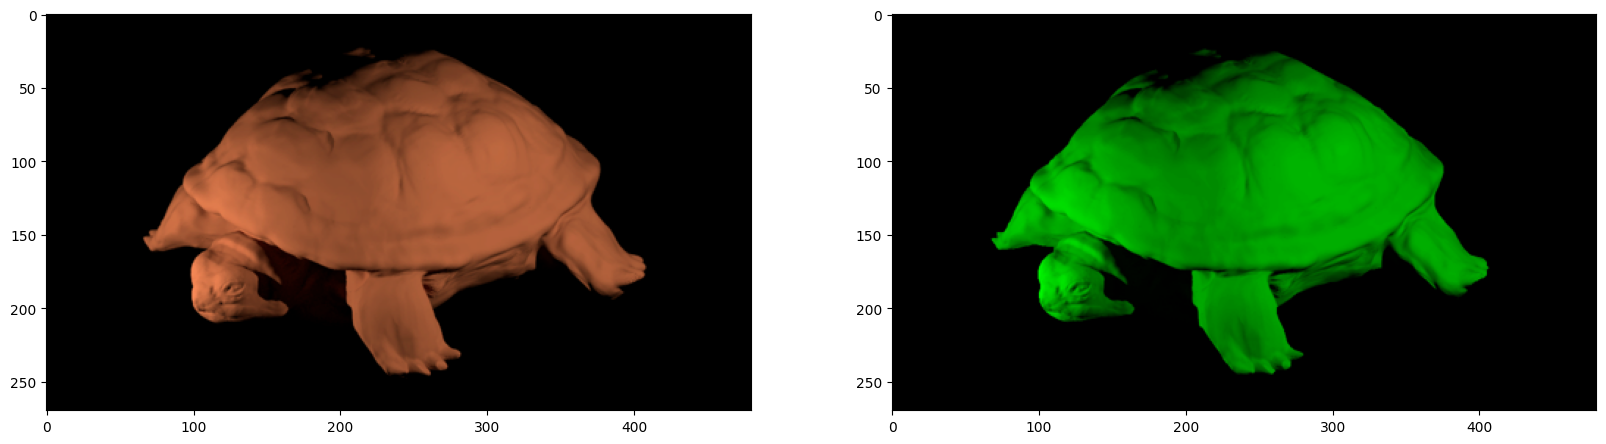

In [45]:
def recolouring(albedo_img, shading_img):
    albedo_img[mask] = [0, 255, 0]
    recoloured_image = iid_image_formation(albedo_img, shading_img)
    return recoloured_image


object_recoloured = cv2.cvtColor(recolouring(object_albedo, object_shading), cv2.COLOR_BGR2RGB)
visualize_((picked_object/picked_object.max()*255.).astype(int),
          (object_recoloured/object_recoloured.max()*255.).astype(int))

*It is not pure green everywhere because the reconstructed image is the product of 1 (pure green) multiplied by different shading values at different positions.*

__Note:__  this was a simple case where the image is synthetic, object centered and has only one colour, and you have access to its ground-truth intrinsic images. Real world scenarios require more than just replacing a single colour with another, not to mention the complexity of achieving a decent intrinsic image decomposition.

# 4 Photometric Stereo *(60 pts)*



In this part of the assignment, you are going to implement the photometric stereo algorithm as described in Section 5.4 (Forsyth and Ponce, *Computer Vision: A Modern Approach*). The chapter snippet has been included in the assignment zip file.

Following this instruction, you will edit and fill in your code in the procedures below **estimate_alb_nrm()**, **check_integrability()** and **construct_surface()**, that you can find in the codecells below (4.1, 4.2 and 4.3, respectively). The main script **photometric_stereo** (4.4) is provided for reference and should not be taken as is. Throughout the assignment, you will be asked to perform different trials and experiments which will require you to adjust the main code accordingly; this also shows how well you can cope with the materials.

Include images of the results into your notebook at informative points. For 3D models, make sure to choose a viewpoint that makes the structure as clear as possible and/or feel free to take them from multiple viewpoints.

### 4.1 Estimating Albedo and Surface Normal *(15 pts)*
Let us start with the grayscale sphere model, which is located in the SphereGray5 folder. The folder contains 5 images of a sphere with a grayscale checker texture under similar lighting conditions as the one in the book. Your task is to estimate the surface reflectance (albedo) and surface normal of this model. The light source directions are encoded in the image file names.

1. Complete the code for function **estimate_alb_nrm()** to estimate albedo and surface normal map for the SphereGray5 folder. What do you expect to see in albedo image and how is it different from your result?
2. In principle, what is the minimum number of images you need to estimate albedo and surface normal? Run the algorithm with more images by using SphereGray25, observe the differences in the results and report. You could try all images at once or a few at the time, in an incremental fashion. Choose a strategy and justify it by discussing your results.
3. What is the impact of shadows in photometric stereo? Explain the trick that is used in the text to deal with shadows. Remove that trick from your implementation and check your results. Is the trick necessary in the case of 5 images? how about 25 images?

An answer box can be found below the code cells.

**Hint**: To get the least-squares solution of a linear system, you can use **numpy.linalg.lstsq** function.

In [57]:
# Helper functions to load the synthetic images

def load_syn_images(image_dir='./images/photometrics_images/SphereGray5/', channel=0):
    files = os.listdir(image_dir)
    nfiles = len(files)

    image_stack = None
    V = 0
    Z = 0.5

    for i in range(nfiles):
        # read input image
        im = cv2.imread(os.path.join(image_dir, files[i]))
        im = np.flip(im, axis=-1)
        im = im[:,:,channel]

        # stack at third dimension
        if image_stack is None:
            h, w = im.shape
            print('Image size (H*W): %d*%d' %(h,w) )
            image_stack = np.zeros([h, w, nfiles], dtype=int)
            V = np.zeros([nfiles, 3], dtype=np.float64)

        image_stack[:,:,i] = im

        # read light direction from image name
        X = np.double(files[i][(files[i].find('_')+1):files[i].rfind('_')])
        Y = np.double(files[i][files[i].rfind('_')+1:files[i].rfind('.png')])
        V[i, :] = [-X, Y, Z]

    # normalization
    image_stack = np.double(image_stack)
    min_val = np.min(image_stack)
    max_val = np.max(image_stack)
    image_stack = (image_stack - min_val) / (max_val - min_val) if max_val!=min_val else np.zeros(image_stack.shape)  # avoid fail when image_stack==0
    normV = np.tile(np.sqrt(np.sum(V ** 2, axis=1, keepdims=True)), (1, V.shape[1]))
    scriptV = V / normV

    return image_stack, scriptV

In [58]:
## Helper function for showing results.

def show_results(albedo, normals, height_map=None, SE=None):
    # Stride in the plot, you may want to adjust it to different images
    stride = 1

    if albedo is not None:
        # showing albedo map
        fig = plt.figure()
        #albedo_max = albedo.max()
        albedo_max = 1
        albedo = albedo / albedo_max
        print(albedo.shape)
        plt.imshow(albedo, cmap="gray")
        plt.show()

    # showing normals as three separate channels
    figure = plt.figure()
    ax1 = figure.add_subplot(131)
    ax1.imshow(normals[..., 0])
    ax2 = figure.add_subplot(132)
    ax2.imshow(normals[..., 1])
    ax3 = figure.add_subplot(133)
    ax3.imshow(normals[..., 2])
    plt.show()

    # meshgrid
    X, Y, _ = np.meshgrid(np.arange(0,np.shape(normals)[0], stride),
    np.arange(0,np.shape(normals)[1], stride),
    np.arange(1))
    X = X[..., 0]
    Y = Y[..., 0]

    '''
    =============
    You could further inspect the shape of the objects and normal directions by using plt.quiver() function.
    =============
    '''

    if height_map is not None:
      # plotting model geometry
      H = height_map[::stride,::stride]
      fig = plt.figure()
      ax = fig.gca(projection='3d')
      ax.plot_surface(X,Y, H.T)
      plt.show()

    if SE is not None:
      # plotting the SE
      H = SE[::stride,::stride]
      fig = plt.figure()
      ax = fig.gca(projection='3d')
      ax.plot_surface(X,Y, H.T)
      plt.show()

In [141]:
def estimate_alb_nrm(image_stack, scriptV, shadow_trick=True):
    '''
    Compute the gradient of the surface
    INPUT:
        - image_stack : the images of the desired surface stacked up on the 3rd dimension
        - scriptV : matrix V (in the algorithm) of source and camera information
        - shadow_trick: (true/false) whether or not to use shadow trick in solving linear equations
    OUTPUT:
        - albedo : the surface albedo
        - normal : the surface normal
    '''

    h, w, _ = image_stack.shape

    # create arrays for
    # albedo (1 channel)
    # normal (3 channels)
    albedo = np.zeros([h, w])
    normal = np.zeros([h, w, 3])

    # ================
    # YOUR CODE HERE
    #
    # for each point in the image array
    #     stack image values into a vector i
    #     construct the diagonal matrix scriptI
    #     solve scriptI * scriptV * g = scriptI * i to obtain g for this point
    #     albedo at this point is |g|
    #     normal at this point is g / |g|
    # ================
    for p in range(h):
        for q in range(w):
            i = image_stack[p, q]
            if shadow_trick:
                scriptI = np.diag(i)
                g = np.linalg.lstsq(np.matmul(scriptI, scriptV), np.matmul(scriptI,i), rcond=None)[0]
            else:
                g = np.linalg.lstsq(scriptV, i)[0]
            
            g_norm = np.linalg.norm(g)
            albedo[p, q] = g_norm
            normal[p, q] = g/g_norm
            
    return albedo, normal

### The result with 5 images with shadow trick

Image size (H*W): 512*512


/var/folders/hv/njbzfltn3yl5h60gky34s6700000gn/T/ipykernel_12774/120206381.py:42: RuntimeWarning: invalid value encountered in true_divide
  normal[p, q] = g/g_norm


(512, 512)


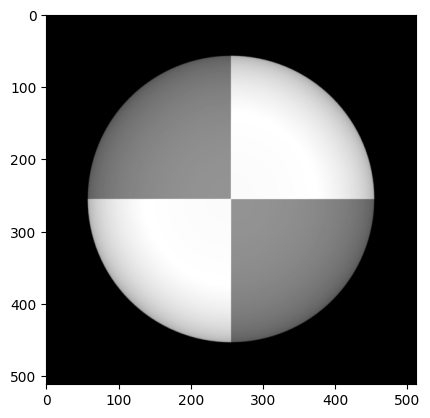

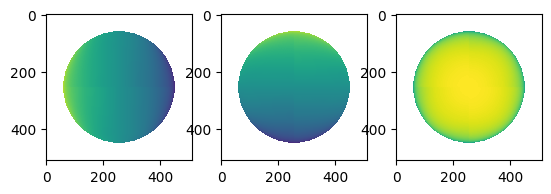

In [147]:
# load syn images
image_stack, scriptV = load_syn_images(image_dir='./images/photometrics_images/SphereGray5/')

# estimate_alb_nrm
albedo_5_trick, normal_5_trick = estimate_alb_nrm(image_stack, scriptV)

# Show results
show_results(albedo_5_trick, normal_5_trick)

### The result with 5 images without shadow trick

Image size (H*W): 512*512


/var/folders/hv/njbzfltn3yl5h60gky34s6700000gn/T/ipykernel_12774/120206381.py:38: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  g = np.linalg.lstsq(scriptV, i)[0]
/var/folders/hv/njbzfltn3yl5h60gky34s6700000gn/T/ipykernel_12774/120206381.py:42: RuntimeWarning: invalid value encountered in true_divide
  normal[p, q] = g/g_norm


(512, 512)


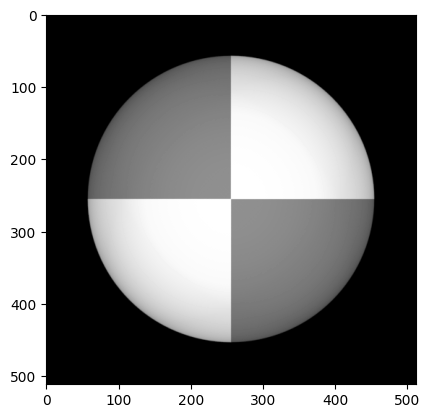

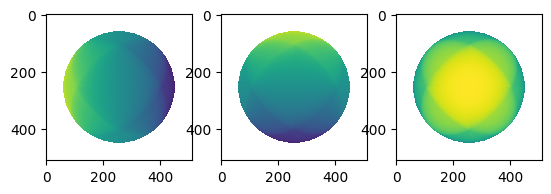

In [148]:
# load syn images
image_stack, scriptV = load_syn_images(image_dir='./images/photometrics_images/SphereGray5/')

# estimate_alb_nrm
albedo_5, normal_5 = estimate_alb_nrm(image_stack, scriptV, shadow_trick=False)

# Show results
show_results(albedo_5, normal_5)

### The result with 25 images with shadow trick

Image size (H*W): 512*512


/var/folders/hv/njbzfltn3yl5h60gky34s6700000gn/T/ipykernel_12774/120206381.py:42: RuntimeWarning: invalid value encountered in true_divide
  normal[p, q] = g/g_norm


(512, 512)


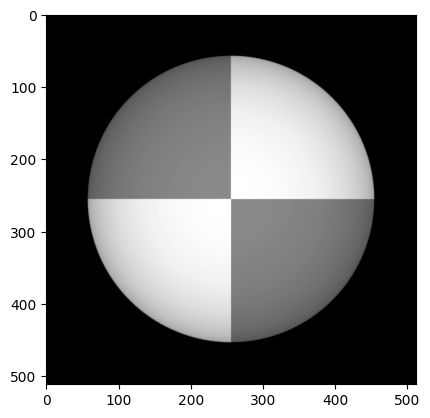

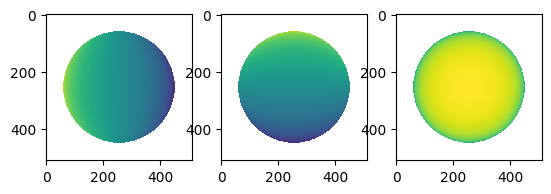

In [149]:
# load syn images
image_stack, scriptV = load_syn_images(image_dir='./images/photometrics_images/SphereGray25/')

# estimate_alb_nrm
albedo_25_trick, normal_25_trick = estimate_alb_nrm(image_stack, scriptV)

# Show results
show_results(albedo_25_trick, normal_25_trick)

### The result with 25 images without shadow trick

Image size (H*W): 512*512


/var/folders/hv/njbzfltn3yl5h60gky34s6700000gn/T/ipykernel_12774/120206381.py:38: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  g = np.linalg.lstsq(scriptV, i)[0]
/var/folders/hv/njbzfltn3yl5h60gky34s6700000gn/T/ipykernel_12774/120206381.py:42: RuntimeWarning: invalid value encountered in true_divide
  normal[p, q] = g/g_norm


(512, 512)


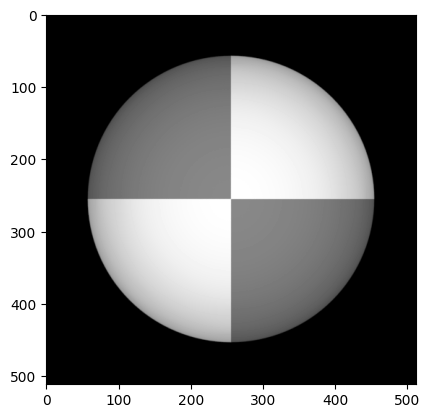

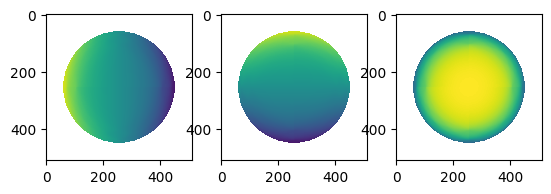

In [150]:
# load syn images
image_stack, scriptV = load_syn_images(image_dir='./images/photometrics_images/SphereGray25/')

# estimate_alb_nrm
albedo_25, normal_25 = estimate_alb_nrm(image_stack, scriptV, shadow_trick=False)

# Show results
show_results(albedo_25, normal_25)

### The result of sequential increase of the number of images used from 1 to 5 on SphereGrey5

Image size (H*W): 512*512
Number of usmages used: 1


/var/folders/hv/njbzfltn3yl5h60gky34s6700000gn/T/ipykernel_12774/1191405631.py:36: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  g = np.linalg.lstsq(np.matmul(scriptI, scriptV), np.matmul(scriptI,i))[0]
/var/folders/hv/njbzfltn3yl5h60gky34s6700000gn/T/ipykernel_12774/1191405631.py:42: RuntimeWarning: invalid value encountered in true_divide
  normal[p, q] = g/g_norm


(512, 512)


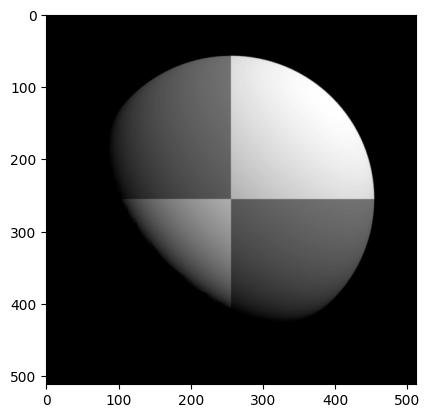

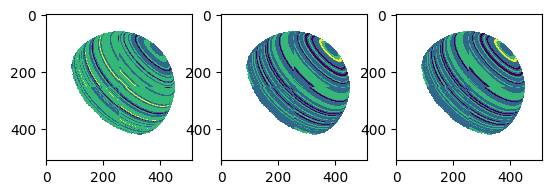

Number of usmages used: 2
(512, 512)


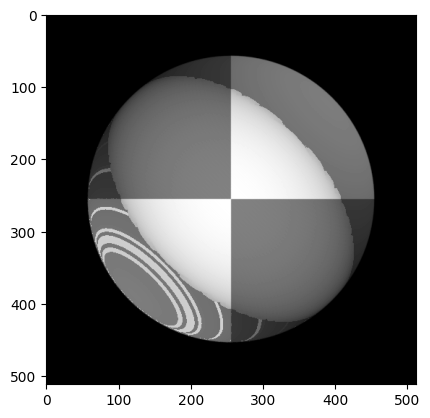

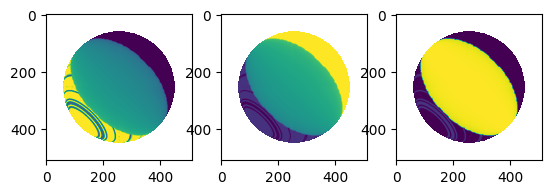

Number of usmages used: 3
(512, 512)


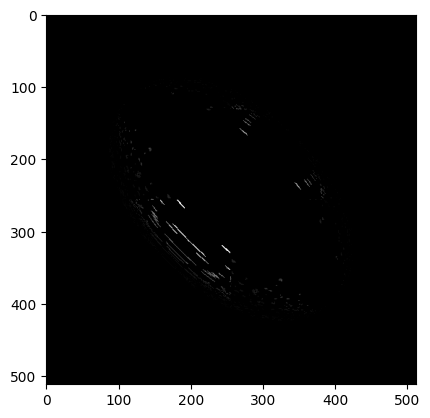

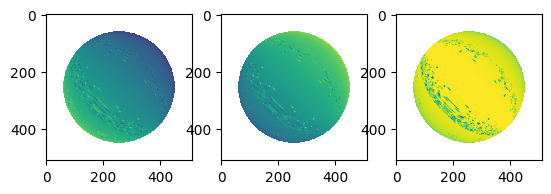

Number of usmages used: 4
(512, 512)


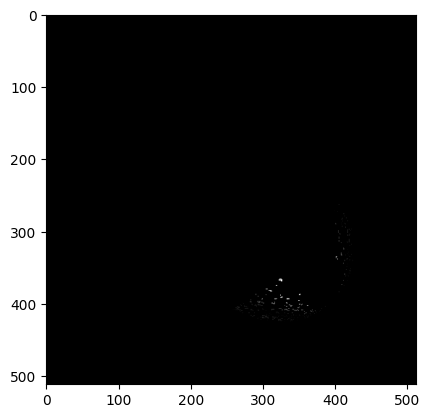

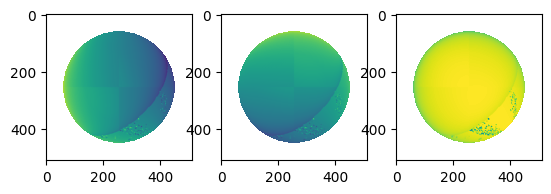

Number of usmages used: 5
(512, 512)


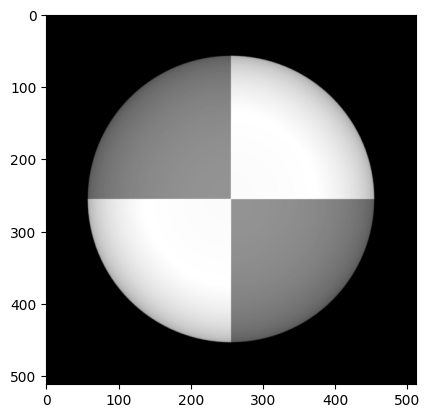

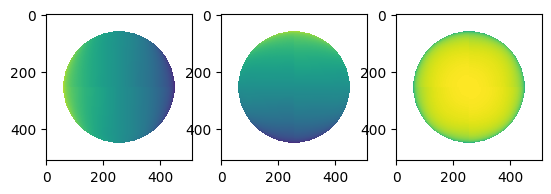

In [125]:
# load syn images
image_stack, scriptV = load_syn_images(image_dir='./images/photometrics_images/SphereGray5/')

for num_images in range(1, 6):
    print(f"Number of images used: {num_images}")
    # estimate_alb_nrm
    albedo, normal = estimate_alb_nrm(image_stack[:, :, :num_images], scriptV[:num_images, :])

    # Show results
    show_results(albedo, normal)

### The result of sequential increase of the number of images used from 1 to 10 on GraySphere25

Image size (H*W): 512*512
Number of usmages used: 1


/var/folders/hv/njbzfltn3yl5h60gky34s6700000gn/T/ipykernel_12774/1191405631.py:36: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  g = np.linalg.lstsq(np.matmul(scriptI, scriptV), np.matmul(scriptI,i))[0]
/var/folders/hv/njbzfltn3yl5h60gky34s6700000gn/T/ipykernel_12774/1191405631.py:42: RuntimeWarning: invalid value encountered in true_divide
  normal[p, q] = g/g_norm


(512, 512)


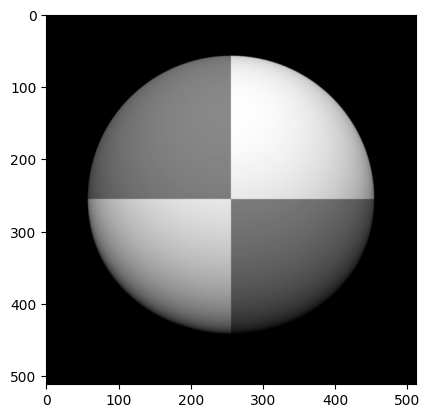

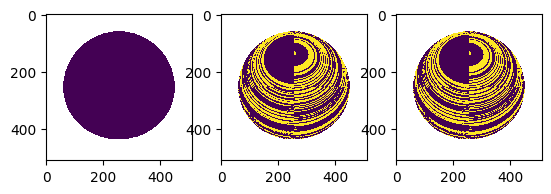

Number of usmages used: 2
(512, 512)


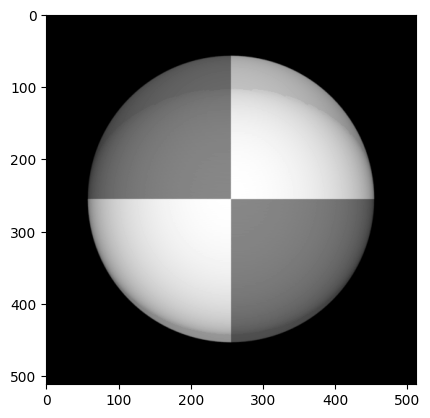

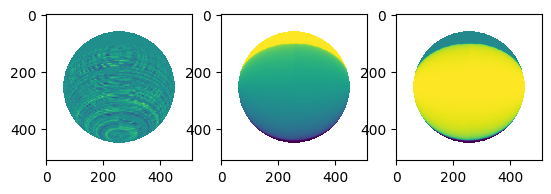

Number of usmages used: 3
(512, 512)


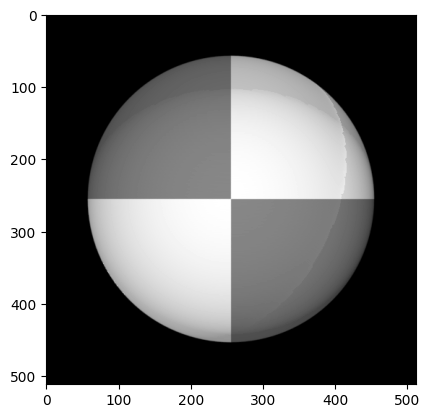

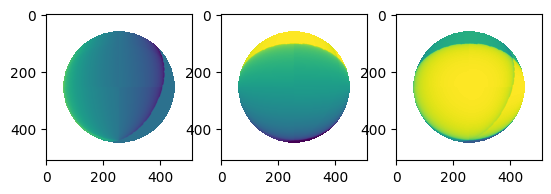

Number of usmages used: 4
(512, 512)


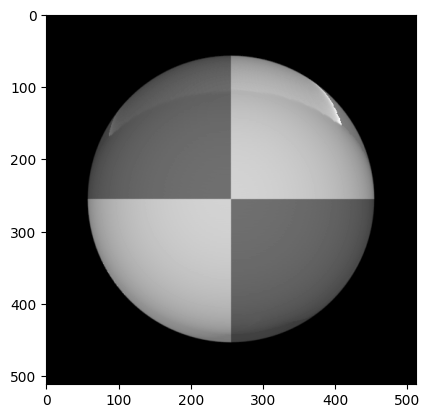

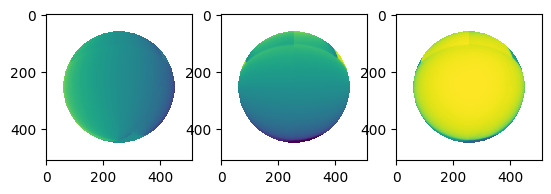

Number of usmages used: 5
(512, 512)


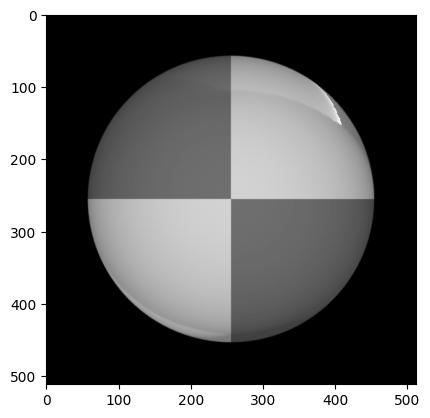

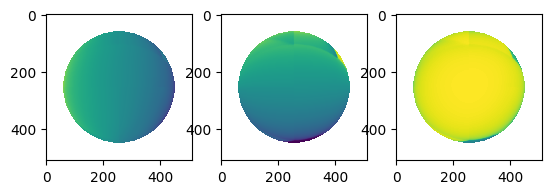

Number of usmages used: 6
(512, 512)


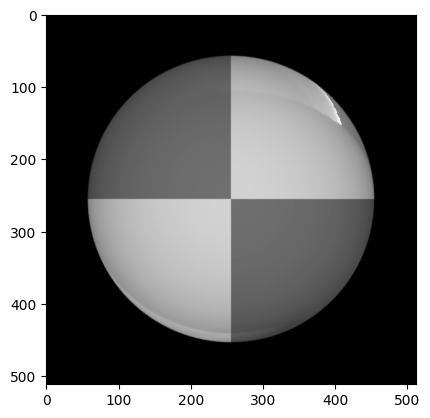

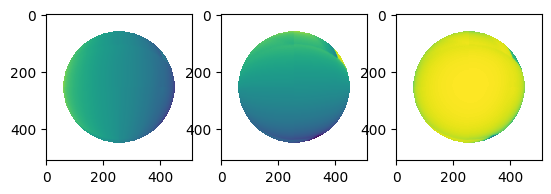

Number of usmages used: 7
(512, 512)


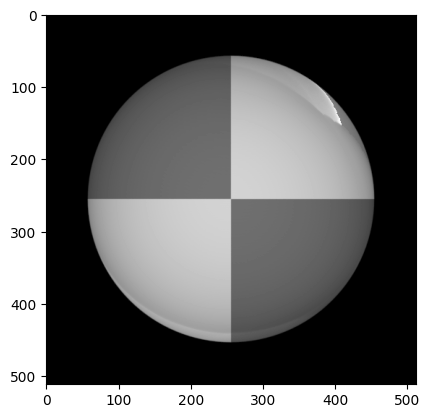

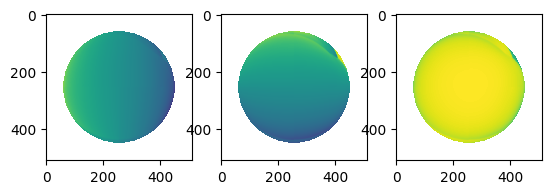

Number of usmages used: 8
(512, 512)


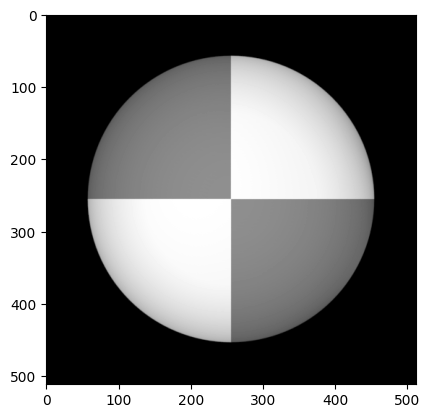

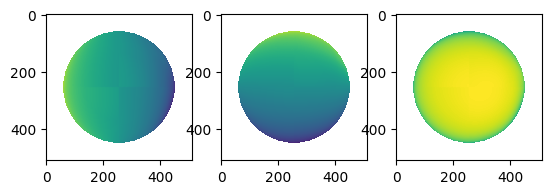

Number of usmages used: 9
(512, 512)


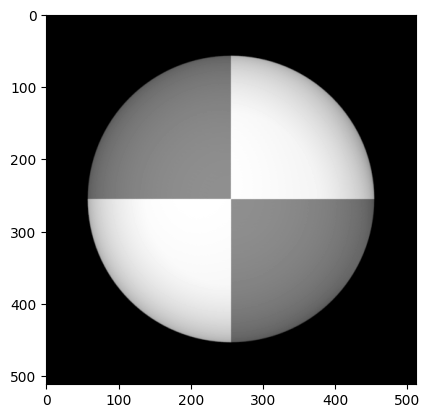

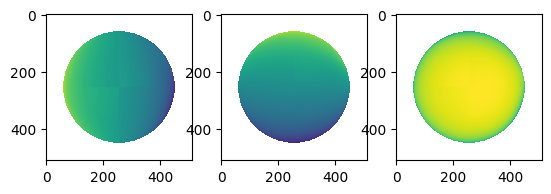

Number of usmages used: 10
(512, 512)


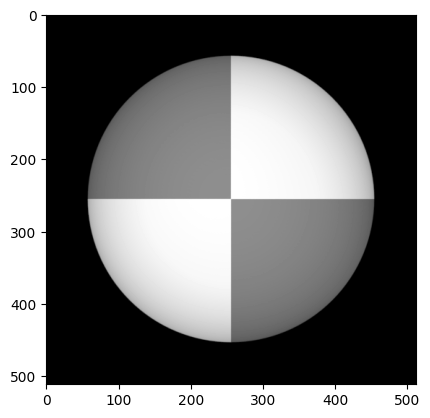

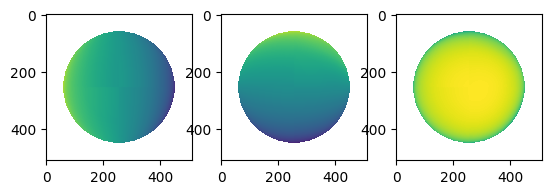

In [129]:
# load syn images
image_stack, scriptV = load_syn_images(image_dir='./images/photometrics_images/SphereGray25/')

for num_images in range(1, 11):
    print(f"Number of usmages used: {num_images}")
    # estimate_alb_nrm
    albedo, normal = estimate_alb_nrm(image_stack[:, :, :num_images], scriptV[:num_images, :])

    # Show results
    show_results(albedo, normal)


*1.* 

*We expect to see the color of the object independently of the lighting conditions. Therefore, we should expect to see the color of the spere parts (in this case white and gray) without any intensity variation that results from the shadows. This is exactly what we obsorve in our results.*

*2.*

*We decided to sequentially select a number of images from 1 to 10 and repeat the process for 25 image dataset and from 1 to 5 for 5 image dataset. The results indicate that 8 images are sufficient to produce good results using images from Sphere25 dataset. After that point, increasing the number of images does not influence the results. However, upon inspection of the images we noticed that the results depend on location of the light and the shadows. The same result was obtained with only 5 images from a different dataset, where images are lit from 4 different directions (top left, top right, bottom left and bottom right) as well as directly from the center. Furthermore, several of the first 8 images in the second dataset have overlap in the locations of the light. Therefore, it seems that a set of 5 images is sufficient as long as the light sources cover the object from all sides.*
*P.S. The literature says 3 images are enough but that is not what we see from the results.*

*3.*

What is the impact of shadows in photometric stereo? Explain the trick that is used in the text to deal with shadows. Remove that trick from your implementation and check your results. Is the trick necessary in the case of 5 images? how about 25 images?

*As was discussed in the previous answer, the impact of shadows is very strong. We can see that from the results on both datasets where we explicitly choose not to apply the shadow trick. We can observe this effect by looking at the plots of surface normals for each axis in both datasets. It is especially visible in the case with 5 images. So the trick is necessary in both cases.*

*The shadow trick is as follows: we create a diagonal matrix with diagonal elements being our image vector and multiply both sides of the equation $\bold{i}(x, y) = V\bold{g}(x, y)$ by it, which zeros out the effects of shadowed regions due to the elements of the matrix being zero at points that are in shadow*

### 4.2 Test of Integrability *(10 pts)*



Before we can reconstruct the surface height map, it is required to compute the partial derivatives $\frac{\delta f}{\delta x}$ and $\frac{\delta f}{\delta y}$ (or *p* and *q* in the algorithm). The partial derivatives also give us a chance to double check our computation, namely the test of *integrability*.

#### 4.2.1. Compute the partial derivatives (p and q in the algorithm) by filling in your code into **check_integrability()** (5 pts).

In [70]:
def check_integrability(normals):
    '''
    Check the surface gradient is acceptable
    INPUTS:
        - normals: normal image
    OUTPUTS:
        - p : df / dx
        - q : df / dy
        - SE : Squared Errors of the 2 second derivatives
    '''

    # initalization
    p = np.zeros(normals.shape[:2])
    q = np.zeros(normals.shape[:2])
    SE = np.zeros(normals.shape[:2])

    # ================
    # YOUR CODE HERE
    # ================
    # Compute p and q, where
    # p measures value of df / dx
    # q measures value of df / dy
    for i in range(len(p)):
        for j in range(len(p[0])):
            p[i, j] = normals[i, j, 0]/normals[i, j, 2]
            q[i, j] = normals[i, j, 1]/normals[i, j, 2]

    # change nan to 0
    p[p!=p] = 0
    q[q!=q] = 0

    # ================
    # YOUR CODE HERE
    # approximate second derivate by neighbor difference
    # and compute the Squared Errors SE of the 2 second derivatives SE
    # ================
    for j in range(1, len(p[0])-1):
        dp = (p[1, j] - p[0, j])/2
        dq = (q[0, j+1] - q[0, j-1])/2
        SE[0,j] = (dp-dq)**2

    for i in range(1, len(p)-1):
        dp = (p[i+1, j] - p[i-1, j])/2
        dq = (q[i, 1] - q[i, 0])
        SE[i,0] = (dp-dq)**2
        for j in range(1, len(p[0])-1):
            dp = (p[i+1, j] - p[i-1, j])/2
            dq = (q[i, j+1] - q[i, j-1])/2
            SE[i,j] = (dp-dq)**2
            
    return p, q, SE

SE: (512, 512) 5.742577149945049


In [151]:
from itertools import product

for dataset, shadow_trick in product(['SphereGray5', 'SphereGray25'], [False, True]):
    # load syn images
    image_stack, scriptV = load_syn_images(image_dir=f'./images/photometrics_images/{dataset}/')
    # estimate_alb_nrm
    albedo, normal = estimate_alb_nrm(image_stack, scriptV, shadow_trick=shadow_trick)

    print(f"\nDataset: {dataset}, shadow trick: {shadow_trick}")
    p, q, SE = check_integrability(normal)
    print('SE:', SE.shape, SE.max())


Image size (H*W): 512*512


/var/folders/hv/njbzfltn3yl5h60gky34s6700000gn/T/ipykernel_12774/120206381.py:38: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  g = np.linalg.lstsq(scriptV, i)[0]
/var/folders/hv/njbzfltn3yl5h60gky34s6700000gn/T/ipykernel_12774/120206381.py:42: RuntimeWarning: invalid value encountered in true_divide
  normal[p, q] = g/g_norm



Dataset: SphereGray5, shadow trick: False
SE: (512, 512) 0.29038929411821185
Image size (H*W): 512*512

Dataset: SphereGray5, shadow trick: True
SE: (512, 512) 1.1575454400510206
Image size (H*W): 512*512

Dataset: SphereGray25, shadow trick: False
SE: (512, 512) 0.24290399073689228
Image size (H*W): 512*512

Dataset: SphereGray25, shadow trick: True
SE: (512, 512) 0.8672454889034573


#### 4.2.2. Second derivatives (5 pts)

Implement and compute the second derivatives according to the algorithm and perform the test of integrability by choosing a reasonable threshold. What could be the reasons for the errors? How does the test perform with different numbers of images used in the reconstruction process in 4.1?

*Write your answer here*

### 4.3 Shape by Integration *(15 pts)*  
To reconstruct the surface height map, we need to continuously integrate the partial derivatives over a path. However, as we are working with discrete structures, you will be simply summing their values.

The algorithm in the chapter presents a way to do the integration in column-major order, that is you start at the top-left corner and integrate along the first column, then go towards the right along each row. Yet, it is also noticed that it would be better to use many different paths and average so as to spread around the errors in the derivative estimates.

#### 4.3.1. Construct the surface height map (7 pts)

Construct the surface height map using column-major order as described in the algorithm, then implement row-major path integration. Your code should go in **construct_surface()**.

**Note**: By default, Numpy used row-major operations. So if you are unrolling an image to linearize the operation, you will end up with a row-major representation. Numpy can be configured to be column-major. Otherwise, if you are using the double for-loops without an unrolling operation, then this concern doesn’t apply.

**Hint**: You could further inspect the shape of the objects and normal directions by using **matplotlib.pyplot.quiver** function. You will have to choose appropriate sub-sampling ratios for proper illustration. You code goes to the **show_results()** function in the code cell above.

In [136]:
def construct_surface(p, q, path_type='column'):
    '''
    Construct the surface function represented as height_map
    INPUT:
       - p : measures value of df / dx
       - q : measures value of df / dy
       - path_type: type of path to construct height_map, either 'column',
         'row', or 'average'
    OUTPUT:
       - height_map: the reconstructed surface
    '''

    h, w = p.shape
    height_map = np.zeros([h, w])

    if path_type=='column':
        for y in range(1,h):
            height_map[y, 0] = height_map[y-1, 0]+q[y,0]
        for x in range(1, w):
            height_map[:, x] = height_map[:, x-1]+p[:, x]
        # ================
        # YOUR CODE HERE
        # ================
        # top left corner of height_map is zero
        # for each pixel in the left column of height_map
        #  height_value = previous_height_value + corresponding_q_value

        # for each row
        #   for each element of the row except for leftmost
        #       height_value = previous_height_value + corresponding_p_value


    elif path_type=='row':
        # ================
        # YOUR CODE HERE
        # ================
        for x in range(1, w):
            height_map[0, x] = height_map[0, x-1]+p[0,x]
        for y in range(1, h):
                height_map[y, :] = height_map[y-1, :]+q[y,:]

    elif path_type=='average':
        for j in range(w):
            height_map[0, j] = height_map[0, j-1]+p[0,j]
        for i in range(1,h):
            if(i!=0):
                height_map[i, 0] = height_map[i-1, 0]+q[i,0]
            for j in range(w):
                height_map[i,j] = ((height_map[i-1, j]+q[i,j])+(height_map[i, j-1]+p[i,j]))/2

    return height_map


### Column

p: (512, 512) q: (512, 512) 0.9357358455618205
(512, 512)


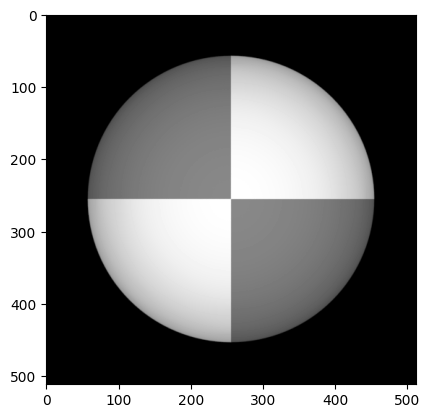

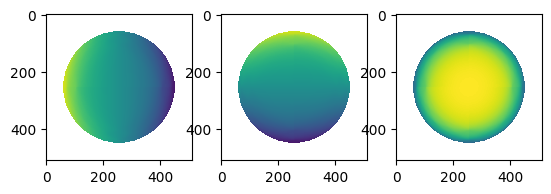

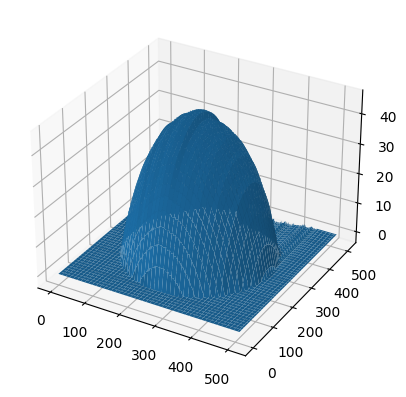

In [137]:
print('p:', p.shape, 'q:', q.shape, q.max())
height_map = construct_surface(p, q, "column")

show_results(albedo, normal, height_map)

### Row

p: (512, 512) q: (512, 512) 0.9357358455618205
(512, 512)


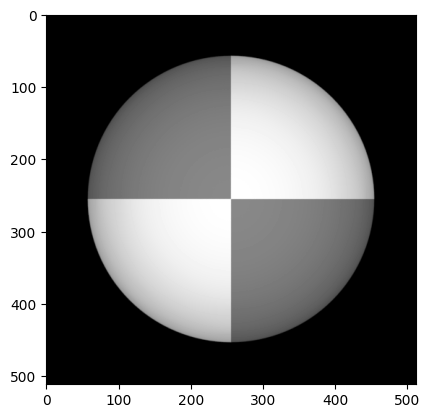

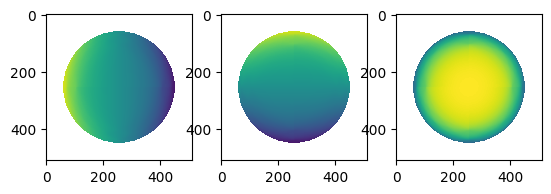

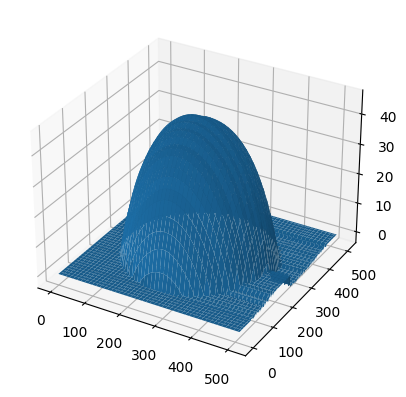

In [138]:
print('p:', p.shape, 'q:', q.shape, q.max())
height_map = construct_surface(p, q, "row")

show_results(albedo, normal, height_map)

### Average

p: (512, 512) q: (512, 512) 0.9357358455618205
(512, 512)


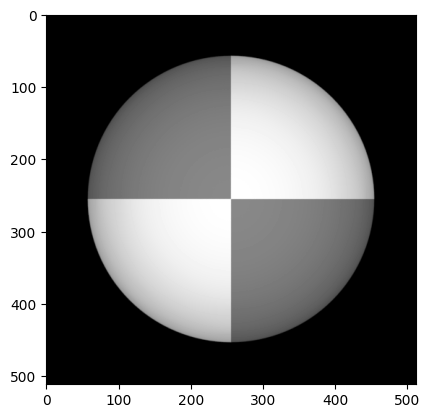

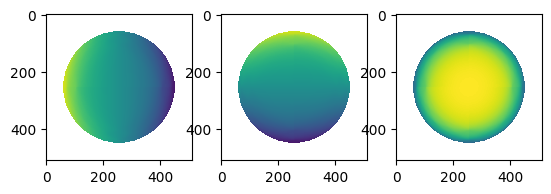

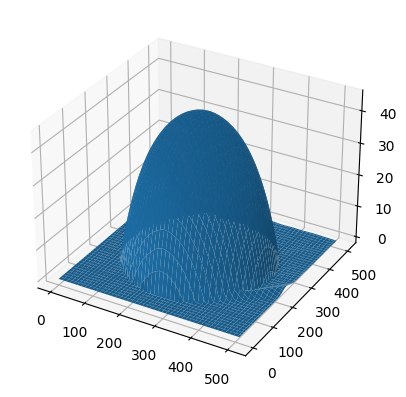

In [139]:
print('p:', p.shape, 'q:', q.shape, q.max())
height_map = construct_surface(p, q, "average")

show_results(albedo, normal, height_map)

#### 4.3.2. What are the differences in the results of the two paths? (4 pts)


*Write your answer here*

#### 4.3.3. Now, take the average of the results. (4 pts)

Do you see any improvement compared to when using only one path? Are the construction results different with different numbers of images being used?

*When using the average, the resulting surface height map is much smoother. TBD*

### 4.4 Experiments with different objects *(20 pts)*
In this part, you will try to run the photometric stereo algorithm in a various number of scenarios to see how well it can be generalized.

#### 4.4.1. Run the algorithm and show the results for the MonkeyGray model. *(5 pts)*

##### 1.a Complete the code below, run the algorithm and show the results

Loading images...

Image size (H*W): 512*512
Finish loading 121 images.

Computing surface albedo and normal map...



/var/folders/hv/njbzfltn3yl5h60gky34s6700000gn/T/ipykernel_12774/120206381.py:42: RuntimeWarning: invalid value encountered in true_divide
  normal[p, q] = g/g_norm


Integrability checking

Number of outliers: 171

(512, 512)


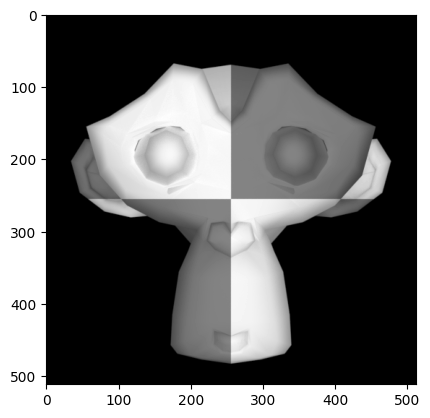

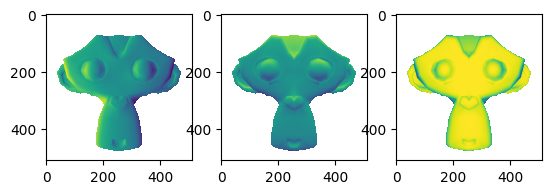

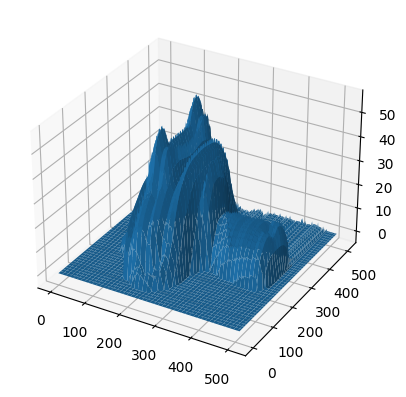

In [152]:
def photometric_stereo(image_dir='./images/photometrics_images/MonkeyGray/'):

    # obtain many images in a fixed view under different illumination
    print('Loading images...\n')
    [image_stack, scriptV] = load_syn_images(image_dir)
    [h, w, n] = image_stack.shape
    print('Finish loading %d images.\n' % n)

    # compute the surface gradient from the stack of imgs and light source mat
    print('Computing surface albedo and normal map...\n')
    albedo, normal = estimate_alb_nrm(image_stack, scriptV)
    
    # integrability check: is (dp / dy  -  dq / dx) ^ 2 small everywhere?
    print('Integrability checking\n')
    p, q, SE = check_integrability(normal)

    threshold = 0.5
    print('Number of outliers: %d\n' % np.sum(SE > threshold))
    SE[SE <= threshold] = float('nan') # for good visualization

    # compute the surface height
    height_map = construct_surface(p, q)
    
    # show results
    show_results(albedo, normal, height_map)

# Use the function
image_dir = 'images/photometrics_images/MonkeyGray/'
photometric_stereo(image_dir)

##### 1.b Explain errors

The albedo results of the monkey may comprise more albedo errors than in case of the sphere. Observe and describe the errors: Experiment with different cases and observe the errors that arise. (You don't need to calculate and give numerical errors.)

What could be the reason for those errors? You may want to experiment with different numbers of images as you did in Question 1 to see the effects.

*Write your answer here*

##### 1.c What do you think could help solving these errors?

*Write your answer here*

#### 4.4.2. Three-channel images. *(5 pts)*

So far, we have assumed that albedos are 1-channel grayscale images and that input images are also 1-channel. To work with 3-channel images, a simple solution is to split the input image into separate channels and treat them individually. Yet, that would generate a small problem while constructing the surface normal map if a pixel value in a channel is zero.


##### 2.a Update the implementation to work for 3-channel RGB inputs and test it with 2 models SphereColor and MonkeyColor.


Loading images...

Image size (H*W): 512*512
Image size (H*W): 512*512
Image size (H*W): 512*512
Computing surface albedo and normal map...



/var/folders/hv/njbzfltn3yl5h60gky34s6700000gn/T/ipykernel_12774/120206381.py:42: RuntimeWarning: invalid value encountered in true_divide
  normal[p, q] = g/g_norm


Integrability checking

Number of outliers R: 272

Number of outliers G: 0

Number of outliers B: 223

(512, 512)


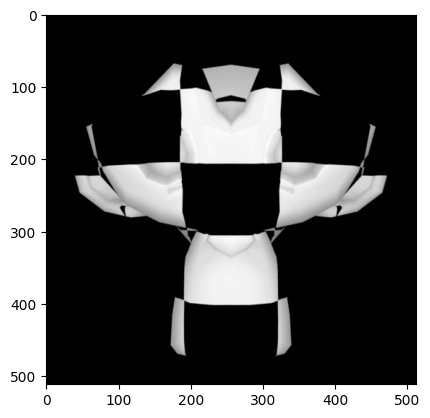

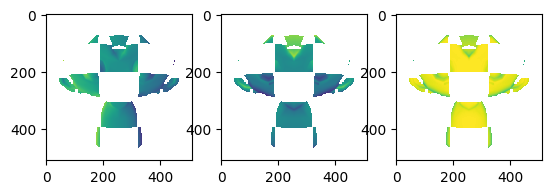

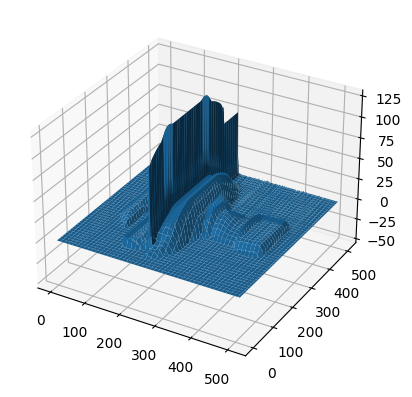

(512, 512)


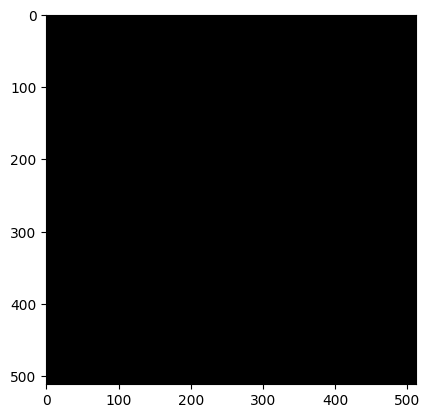

/Users/maxbelitsky/miniconda3/envs/cv1/lib/python3.8/site-packages/matplotlib/image.py:446: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
/Users/maxbelitsky/miniconda3/envs/cv1/lib/python3.8/site-packages/matplotlib/image.py:453: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/Users/maxbelitsky/miniconda3/envs/cv1/lib/python3.8/site-packages/matplotlib/image.py:458: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)


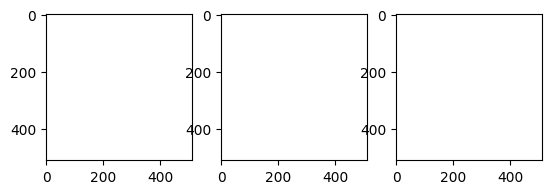

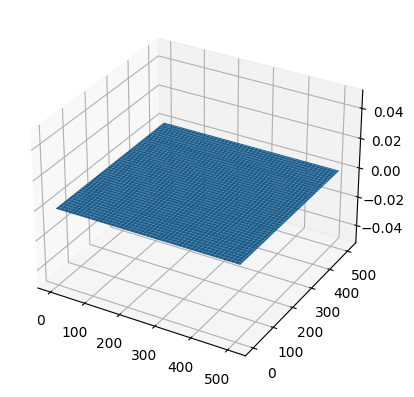

(512, 512)


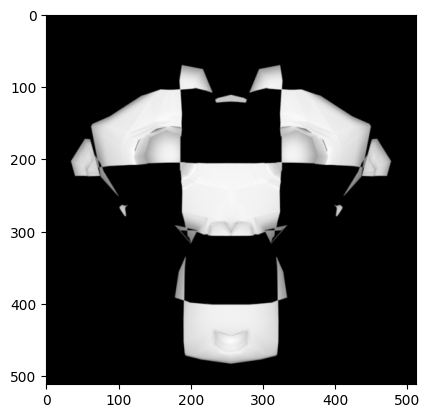

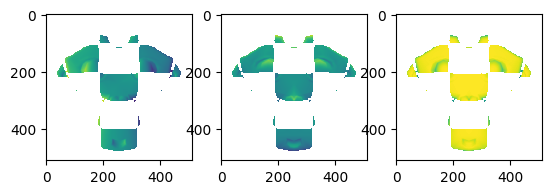

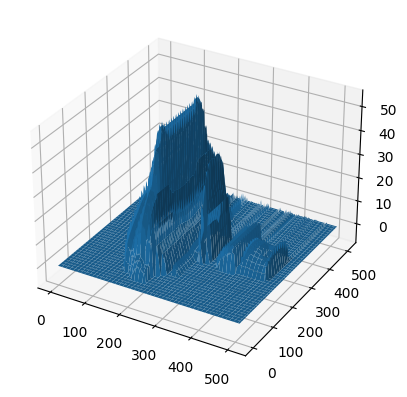

In [167]:
def threeChannel_alb_nrm(image_dir='./images/photometrics_images/SphereColor/', shadow_trick = True):
    for i in range(3):
        [image_stack, scriptV] = load_syn_images(image_dir, channel=i)
        if(i==0):
            [h, w, _] = image_stack.shape
            albedo = np.zeros([h, w])
            normal = np.zeros([h, w, 3])
        alb, nrm = estimate_alb_nrm(image_stack, scriptV, shadow_trick)
        nrm[nrm!=nrm]=0
        albedo += alb
        normal += nrm
    return albedo/3, normal/3

In [ ]:
albedo, normal = threeChannel_alb_nrm()
p, q, SE = check_integrability(normal)
height_map = construct_surface(p, q)
show_results(albedo, normal, height_map)


##### 2.b Explain your changes and show your results.

First the albedo and normal of every seperate channel is taken, after which these are averaged across all channels. After this, the normal procedure for making the height map can be followed again.

##### 2.c Observe the problem in the constructed surface normal map and height map. Explain why a zero pixel could be a problem and propose a way to overcome that.

A lot of NaN values were present for the normals at first, due to dividing by zero for creating the normal. Setting these values to 0 instead of NaN solved this issue.


#### 4.4.3. Real world dataset A *(5 pts)*   

Now, it's the time to try the algorithm on real-world datasets. For that purpose, we are going the use the Yale Face Database and the Apple dataset.

First the Yale Face Database.

##### 3.a Run the algorithm for the Yale Face images: [Yale Face Database](http://cvc.cs.yale.edu/cvc/projects/yalefaces/yalefaces.html). The Yale face data is included in the lab material.

##### 3.b Observe and discuss the results for different integration paths.

An answer box can be found below the code cells.

**Hint**: For proper computation of albedo and surface normal, you may want to suspend the shadow trick described in the text, and use the original formula:
$$i = Vg(x,y)$$

In [ ]:
## help functions for loading Yale Face and Apple images

def load_face_images(image_dir='./images/photometrics_images/yaleB02/'):
    num_images = 64
    filename = os.path.join(image_dir, 'yaleB02_P00_Ambient.pgm')
    ambient_image = cv2.imread(filename, -1)
    h, w = ambient_image.shape

    # get list of all other image files
    import glob
    d = glob.glob(os.path.join(image_dir, 'yaleB02_P00A*.pgm'))
    import random
    d = random.sample(d, num_images)
    filenames = [os.path.basename(x) for x in d]

    ang = np.zeros([2, num_images])
    image_stack = np.zeros([h, w, num_images])

    for j in range(num_images):
        ang[0,j], ang[1,j] = np.double(filenames[j][12:16]), np.double(filenames[j][17:20])
        image_stack[...,j] = cv2.imread(os.path.join(image_dir, filenames[j]), -1) - ambient_image


    x = np.cos(np.pi*ang[1,:]/180) * np.cos(np.pi*ang[0,:]/180)
    y = np.cos(np.pi*ang[1,:]/180) * np.sin(np.pi*ang[0,:]/180)
    z = np.sin(np.pi*ang[1,:]/180)
    scriptV = np.array([y,z,x]).transpose(1,0)

    image_stack = np.double(image_stack)
    image_stack[image_stack<0] = 0
    min_val = np.min(image_stack)
    max_val = np.max(image_stack)
    image_stack = (image_stack - min_val) / (max_val - min_val) if max_val!=min_val else np.zeros(image_stack.shape)  # avoid fail when image_stack==0

    return image_stack, scriptV


def load_apple_images(image_dir='./images/photometrics_images/Apple'):
    num_images = 99
    filename = os.path.join(image_dir, 'I_0000.png')
    try_image = cv2.imread(filename, -1)
    h, w = try_image[:,:,0].shape

    # get list of all other image files
    import glob
    d = glob.glob(os.path.join(image_dir, 'I_00*.png'))
    import random
    d = random.sample(d, num_images)
    filenames = [os.path.basename(x) for x in d]
    filenames_idx = []
    for i in filenames:
        filenames_idx.append(int(i.split('_')[1].split('.')[0]))

    ang = np.zeros([2, num_images])
    image_stack = np.zeros([h, w, num_images])

    for j in range(num_images):
        image_stack[...,j] = cv2.imread(os.path.join(image_dir, filenames[j]), -1)[:,:,0]

    with open('./images/photometrics_images/Apple/light_directions_refined.txt') as file:
        lines = [line.split() for line in file]
        x, y, z = [], [], []
        for idx in filenames_idx:
            x.append(float(lines[idx][0]))
            y.append(float(lines[idx][1]))
            z.append(float(lines[idx][2]))

    scriptV = np.array([y,z,x]).transpose(1,0)

    image_stack = np.double(image_stack)
    image_stack[image_stack<0] = 0
    min_val = np.min(image_stack)
    max_val = np.max(image_stack)
    image_stack = (image_stack - min_val) / (max_val - min_val) if max_val!=min_val else np.zeros(image_stack.shape)  # avoid fail when image_stack==0

    return image_stack, scriptV




In [ ]:
'''
For each of Face and Apple, you should:
- Load the images
- Compute the surface albedo and normal map
- Run the integrability check
- Find the number of outliers
- Compute the surface albedo and normal mape surface height
- Show the results
'''

## Face
def photometric_stereo_face(image_dir='./images/photometrics_images/yaleB02/', path_type='average'):
    [image_stack, scriptV] = load_face_images(image_dir)
    [h, w, n] = image_stack.shape
    print('Finish loading %d images.\n' % n)
    # Compute the surface albedo and normal map
    print('Computing surface albedo and normal map...\n')
    # YOUR CODE HERE
    albedo, normal = estimate_alb_nrm(image_stack, scriptV, False)

    # integrability check: is (dp / dy  -  dq / dx) ^ 2 small everywhere?
    print('Integrability checking')
    # YOUR CODE HERE
    p, q, SE = check_integrability(normal)

    # YOUR CODE HERE
    threshold = 0.5;
    print('Number of outliers: %d\n' % np.sum(SE > threshold))
    SE[SE <= threshold] = float('nan') # for good visualization

    # YOUR CODE HERE
    # compute the surface height
    height_map = construct_surface(p, q, path_type)

    # show results
    show_results(albedo, normal, height_map)

## Apple
def photometric_stereo_apple(image_dir='./images/photometrics_images/Apple/', path_type='average'):
    [image_stack, scriptV] = load_apple_images(image_dir)
    [h, w, n] = image_stack.shape
    print('Finish loading %d images.\n' % n)
    # Compute the surface albedo and normal map
    print('Computing surface albedo and normal map...\n')
    # YOUR CODE HERE
    albedo, normal = estimate_alb_nrm(image_stack, scriptV, False)

    # integrability check: is (dp / dy  -  dq / dx) ^ 2 small everywhere?
    print('Integrability checking')
    # YOUR CODE HERE
    p, q, SE = check_integrability(normal)

    # YOUR CODE HERE
    threshold = 0.5;
    print('Number of outliers: %d\n' % np.sum(SE > threshold))
    SE[SE <= threshold] = float('nan') # for good visualization

    # YOUR CODE HERE
    # compute the surface height
    height_map = construct_surface(p, q, path_type)

    # show results
    show_results(albedo, normal, height_map)
    
photometric_stereo_face()

*Write your answer here*

##### 3.c Discuss how the images violate the assumptions of the shape-from-shading methods. Remember to include specific input images to illustrate your points.


*Write your answer here*

##### 3.d How would the results improve when the problematic images are all removed? Try it out and show the results in your notebook.

*Write your answer here*

#### 4.4.4. Real world dataset B (5 pts).  

And finally, the Apple dataset. Show your results on real-world 3-channel RGB inputs, contained in the "Apple" folder.

Observe and discuss the results for different integration paths. You may find difficulties in using this non-sythetic dataset. Try if filtering may help.

In [ ]:
# YOUR CODE HERE

*Write your answers here*

# X Individual Contribution Report *(Mandatory)*

Because we want each student to contribute fairly to the submitted work, we ask you to fill out the textcells below. Write down your contribution to each of the assignment components in percentages. Naturally, percentages for one particular component should add up to 100% (e.g. 30% - 30% - 40%). No further explanation has to be given.


Name:

Contribution on research: \
Contribution on programming: \
Contribution on writing:

Name:

Contribution on research: \
Contribution on programming: \
Contribution on writing:

Name:

Contribution on research: \
Contribution on programming: \
Contribution on writing:

( Name:

Contribution on research: \
Contribution on programming: \
Contribution on writing: )

# -End of Notebook-